In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy.io
import PIL.Image as pil
import PIL.ImageFilter as pilf
import heatmap as ground_truth
import crop
import cv2

image_path = '../ShanghaiTech/part_A/train_data/images/IMG_6.jpg'
truth_path = '../ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_6.mat'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


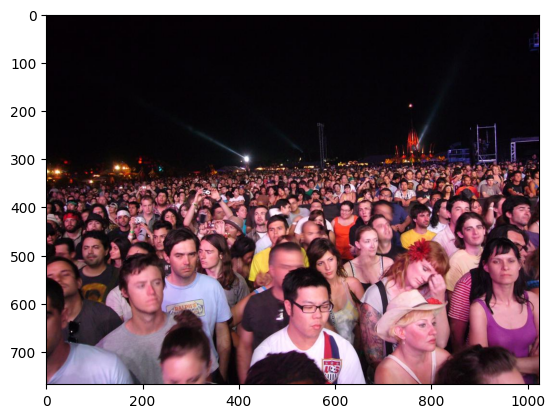

In [4]:
img = pil.open(image_path)
width, height = img.size
imgplot = plt.imshow(img)

In [5]:
gt_file = scipy.io.loadmat(truth_path)
gt = np.asarray(gt_file['image_info'][0][0][0][0][0])
count = int(gt_file['image_info'][0][0][0][0][1])
print("Number of people in image: " + str(count))




Number of people in image: 554


In [6]:
##Don't need to merge xi after all, done later in code

##print(str(points_xi))
print("Input matrix: " + str(gt))
rot = np.rot90(gt, 1, axes=(0,1))
rot = np.flip(rot, axis=0)
##points_xi = points_xi.reshape(1,1546)
##print(str(points_xi))
##rot = np.concatenate((rot, points_xi), axis=0)
print("Rotated matrix:" + str(rot))
print("Max x: " + str(rot[0].max()) + "\nMax y: " + str(rot[1].max()))



Input matrix: [[   9.00940439  644.82791619]
 [  38.27982181  548.65368751]
 [ 212.50849695  558.41049332]
 ...
 [1016.63190893  316.92954958]
 [1016.98036628  297.41593796]
 [1006.64279822  309.43771655]]
Rotated matrix:[[   9.00940439   38.27982181  212.50849695 ... 1016.63190893
  1016.98036628 1006.64279822]
 [ 644.82791619  548.65368751  558.41049332 ...  316.92954958
   297.41593796  309.43771655]]
Max x: 1018.1418907770994
Max y: 761.9095858769181


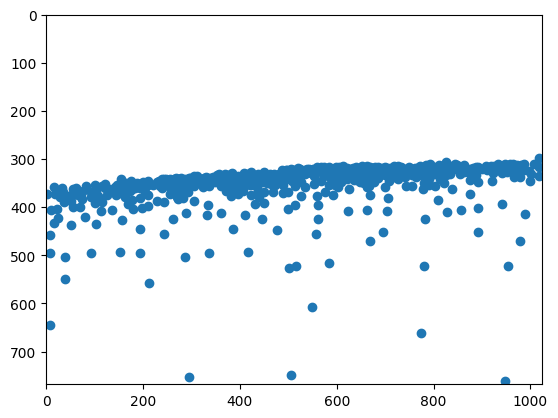

In [7]:
plt.gca().invert_yaxis()
plt.xlim(0,width)
plt.ylim(height,0)
plt.scatter(rot[0], rot[1])

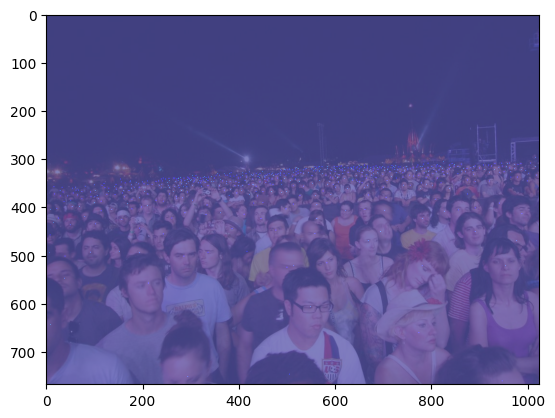

In [8]:
"""
bins = [range(width + 1), range(height + 1)]


hst = np.asarray(np.histogram2d(rot[0], rot[1], bins))
print(str(bins))
print(str(hst))
hst = hst[0]
print("Sum of array (total people) = " + str(hst.sum()))
print("Max value of array (people/pix) = " + str(hst.max()))
print("Array dimensions = " + str(hst.shape) + "vs w*h = " + str(width) + "x" + str(height))
"""
pointMap = np.zeros((height, width))
for pt in gt:
    pointMap[int(pt[1]), int(pt[0])] = 1
plt.imshow(img, alpha=0.5)
##pointMap = pil.fromarray(np.rot90(np.flip(255*hst.astype(np.uint8), axis=1), k=1, axes=(0,1)))
pointImg = pil.fromarray(255*pointMap.astype(np.uint8))

plt.imshow(pointImg, cmap = "jet", alpha=0.5)
plt.show()


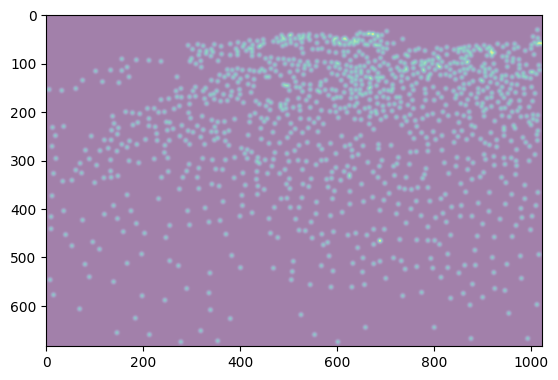

In [19]:

#heatMap = pil.new(mode='L', size=(width,height))
heatMap = cv2.GaussianBlur(pointMap,(0,0),3,3)

plt.imshow(heatMap, alpha=0.5)


(684, 1024)
[75.06026228 53.55815047 64.42271619 ... 11.75871478 11.28346226
 12.18592631]


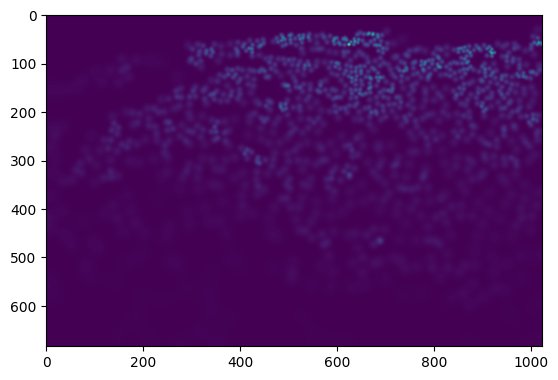

In [26]:
print(str(pointMap.shape))
print(str(ground_truth.findRadius(gt)))
heatMap = ground_truth.gaussian(gt, (height,width))
plt.imshow(heatMap)
plt.savefig('sample_heatmap.png')

1.0 0.0


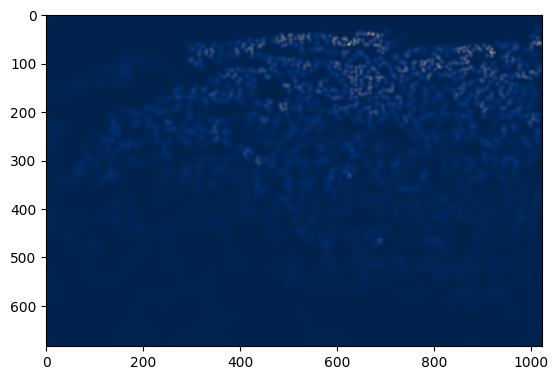

In [46]:
print(heatMap.max(), heatMap.min())
heatMap = heatMap*(1.0/heatMap.max())
hmImg = pil.fromarray(np.uint8(cm.cividis(heatMap)*255))
hmImg.save('sample_heatmap.png')
plt.imshow(hmImg)

In [13]:
cropped = crop.crop(image_path)
cropped.show()